In [3]:
import opendatasets as od 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib
import os
import joblib
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [5]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [6]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [7]:
weather_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [8]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
weather_df.dropna(subset=['RainTomorrow'], inplace=True)

<AxesSubplot:title={'center':'Number of Rows per years'}, xlabel='Date', ylabel='count'>

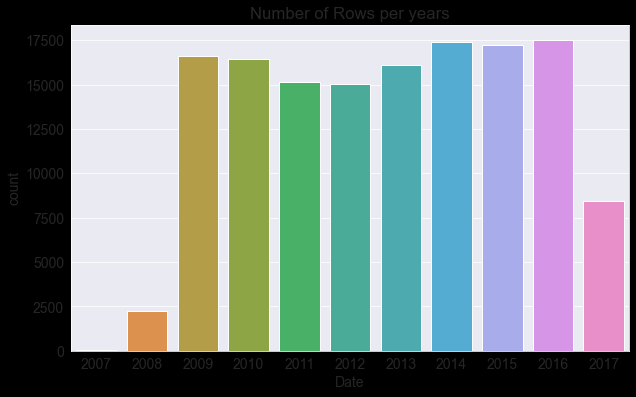

In [11]:
plt.title('Number of Rows per years')
sns.countplot(x=pd.to_datetime(weather_df.Date).dt.year)

In [12]:
year = pd.to_datetime(weather_df.Date).dt.year

train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

In [13]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [14]:
input_columns = list(train_df.columns)[1:-1]
target_column = 'RainTomorrow'

In [15]:
train_inputs = train_df[input_columns].copy()
train_target = train_df[target_column].copy()

val_inputs = val_df[input_columns].copy()
val_target = val_df[target_column].copy()

test_inputs = test_df[input_columns].copy()
test_target = test_df[input_columns].copy()

In [16]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [17]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [18]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy='mean').fit(weather_df[numerical_cols])

In [21]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [22]:
test_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler  = MinMaxScaler().fit(weather_df[numerical_cols])

In [25]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [26]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(weather_df[categorical_cols])

In [29]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [30]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] =  encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [31]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [32]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]

In [33]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
tree_model = DecisionTreeClassifier(random_state=42)

In [36]:
%%time 
tree_model.fit(X_train, train_target)

Wall time: 6.07 s


DecisionTreeClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
train_predictions = tree_model.predict(X_train)

In [39]:
train_predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [40]:
pd.value_counts(train_predictions)

No     76707
Yes    22281
dtype: int64

In [41]:
train_probability = tree_model.predict_proba(X_train)
train_probability

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [42]:
accuracy_score(train_target, train_predictions)

0.9999797955307714

In [43]:
tree_model.score(X_val, val_target)

0.7921188555510418

In [44]:
val_target.value_counts() / len(val_target)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

In [45]:
from sklearn.tree import plot_tree, export_text

[Text(2232.0, 951.3000000000001, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(1116.0, 679.5, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(558.0, 407.70000000000005, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(279.0, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 407.70000000000005, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(1395.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1953.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(2790.0, 407.70000000000005, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(2511.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3069.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3906.0, 407.70000000000005, 'Rainfall <=

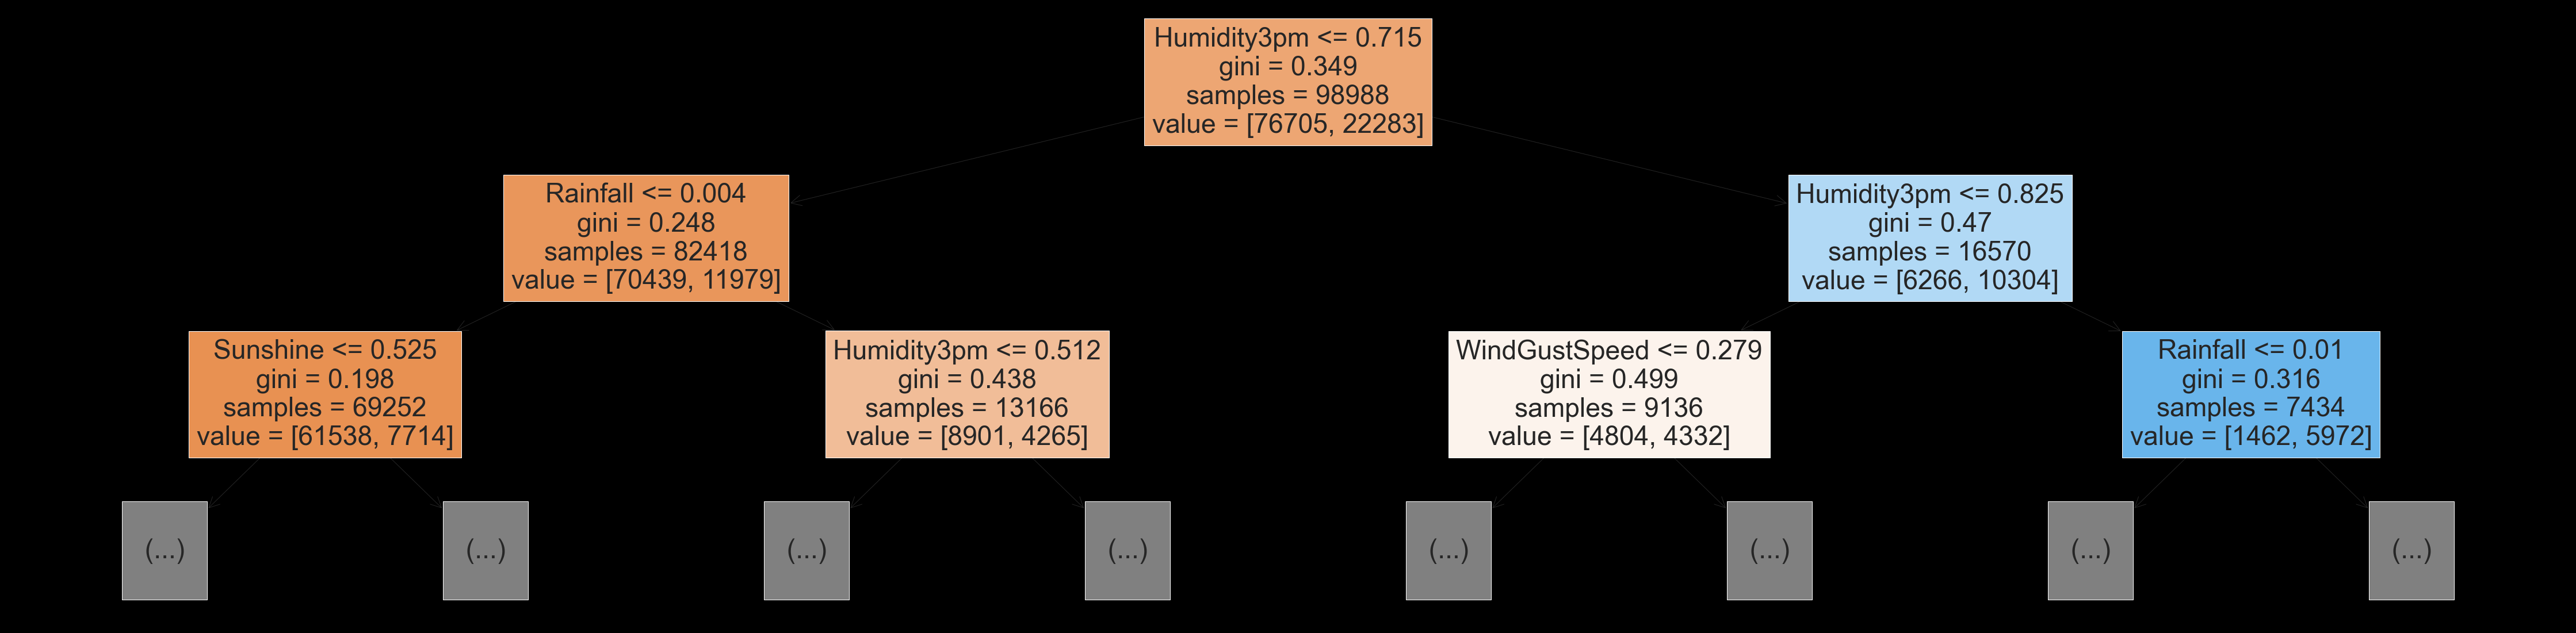

In [46]:
plt.figure(figsize=(80,20))
plot_tree(tree_model, feature_names=X_train.columns, max_depth=2, filled=True)

In [47]:
tree_model.tree_.max_depth

48

In [48]:
tree_text = export_text(tree_model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [49]:
tree_model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [50]:
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : tree_model.feature_importances_
}).sort_values('importance', ascending=False)

In [51]:
importance_df.head(20)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

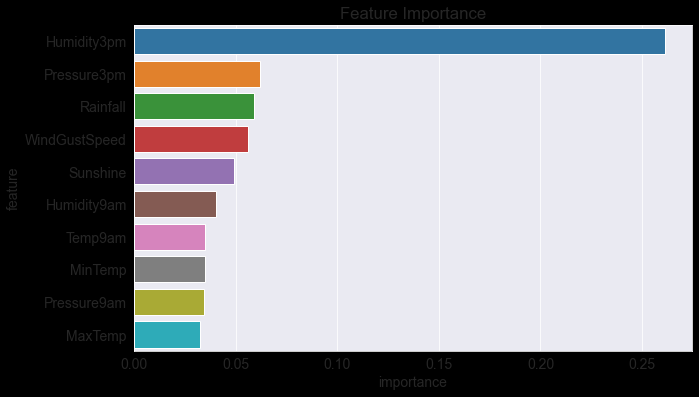

In [52]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

In [53]:
tree_model_1 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [54]:
tree_model_1.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
tree_model_1.score(X_train, train_target)

0.8291308037337859

In [56]:
tree_model_1.score(X_val, val_target)

0.8334397307178921

In [57]:
tree_model_1.classes_

array(['No', 'Yes'], dtype=object)

[Text(2232.0, 951.3000000000001, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(1116.0, 679.5, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(558.0, 407.70000000000005, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(279.0, 135.89999999999998, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(837.0, 135.89999999999998, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(1674.0, 407.70000000000005, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(1395.0, 135.89999999999998, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(1953.0, 135.89999999999998, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(3348.0, 679.5, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Tex

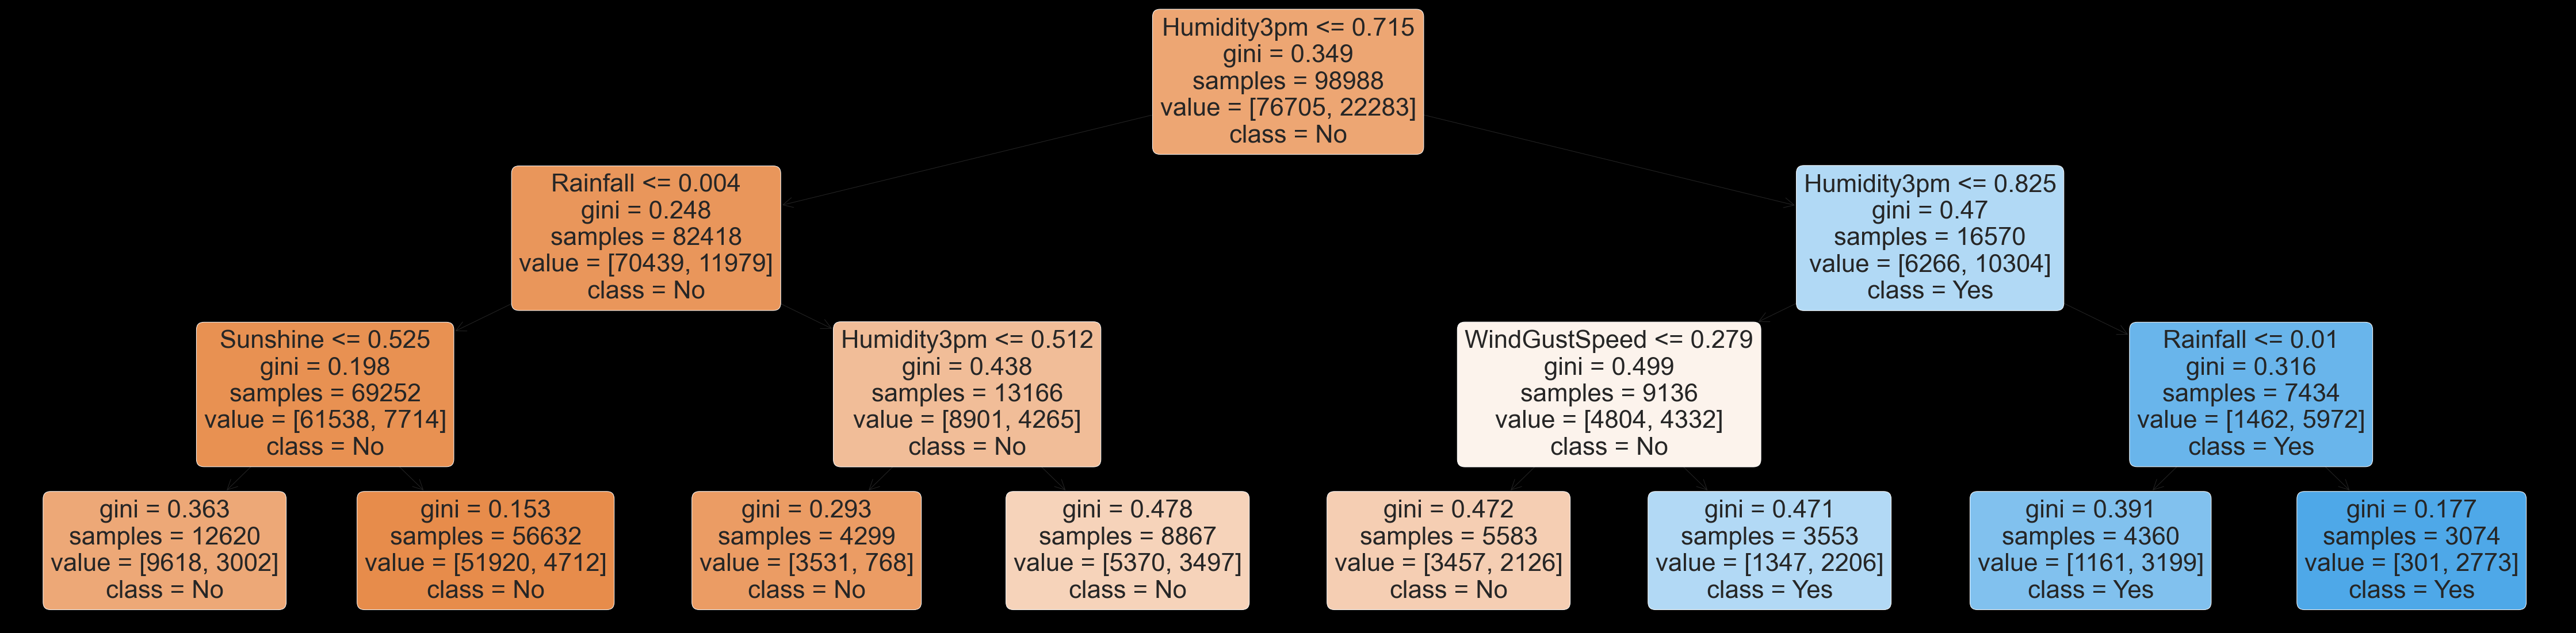

In [58]:
plt.figure(figsize=(80,20))
plot_tree(tree_model_1, feature_names=X_train.columns, filled=True, rounded=True, class_names=tree_model_1.classes_)

In [59]:
print(export_text(tree_model_1, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [60]:
def max_depth_error(md):
    tree_model_2 = DecisionTreeClassifier(max_depth=md, random_state=42)
    tree_model_2.fit(X_train, train_target)

    train_accuracy = 1 - tree_model_2.score(X_train, train_target)
    val_accuracy = 1 - tree_model_2.score(X_val, val_target)

    return {'Max Depth' : md, 'Training Error' : train_accuracy, 'Validation Error' : val_accuracy}

In [61]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 2min 9s


In [62]:
error_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


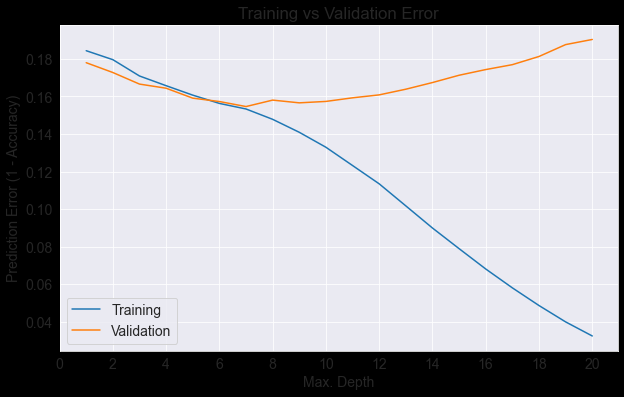

In [63]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [64]:
tree_model_2 = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_target)
tree_model_2.score(X_val, val_target)

0.8453949277465034

In [65]:
tree_model_2.score(X_train, train_target)

0.8466884874934335

In [66]:
tree_model_3 = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42).fit(X_train, train_target)
tree_model_3.score(X_train, train_target)

0.8480421869317493

In [67]:
tree_model_3.score(X_val, val_target)

0.8442342290058615

In [68]:
tree_model_3.tree_.max_depth

12

In [69]:
tree_model_4 = DecisionTreeClassifier(max_depth=12, random_state=42).fit(X_train, train_target)
tree_model_4.score(X_val, val_target)

0.8391851894840694

tree_model_3 is the most optimal with the an accuracy_score of 84%

In [70]:
model_text_3 = export_text(tree_model_3, feature_names=list(X_train.columns))
print(model_text_3[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

RANDOMM FOREST TRAINING

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest_model  = RandomForestClassifier(n_jobs=-1, random_state=42)

In [73]:
%%time 
forest_model.fit(X_train, train_target)

Wall time: 1min 1s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [74]:
forest_model.score(X_train, train_target)

0.9999494888269285

In [75]:
forest_model.score(X_val, val_target)

0.8566537055307295

In [76]:
forest_train_probability = forest_model.predict_proba(X_train)
forest_train_probability

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [77]:
forest_model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

[Text(2232.0, 951.3000000000001, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]\nclass = No'),
 Text(1116.0, 679.5, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]\nclass = No'),
 Text(558.0, 407.70000000000005, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]\nclass = Yes'),
 Text(279.0, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 407.70000000000005, 'WindGustDir_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570, 2734]\nclass = No'),
 Text(1395.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1953.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'RainToday_Yes <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]\nclass = No'),
 Text(2790.0, 407.70000000000005, 'Pressure9am <= 0.521\ngini = 0.207\nsamples = 41960\nvalue = [58514, 7796]\nclass = No'),
 Text(2511.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3069.0, 135.89999999

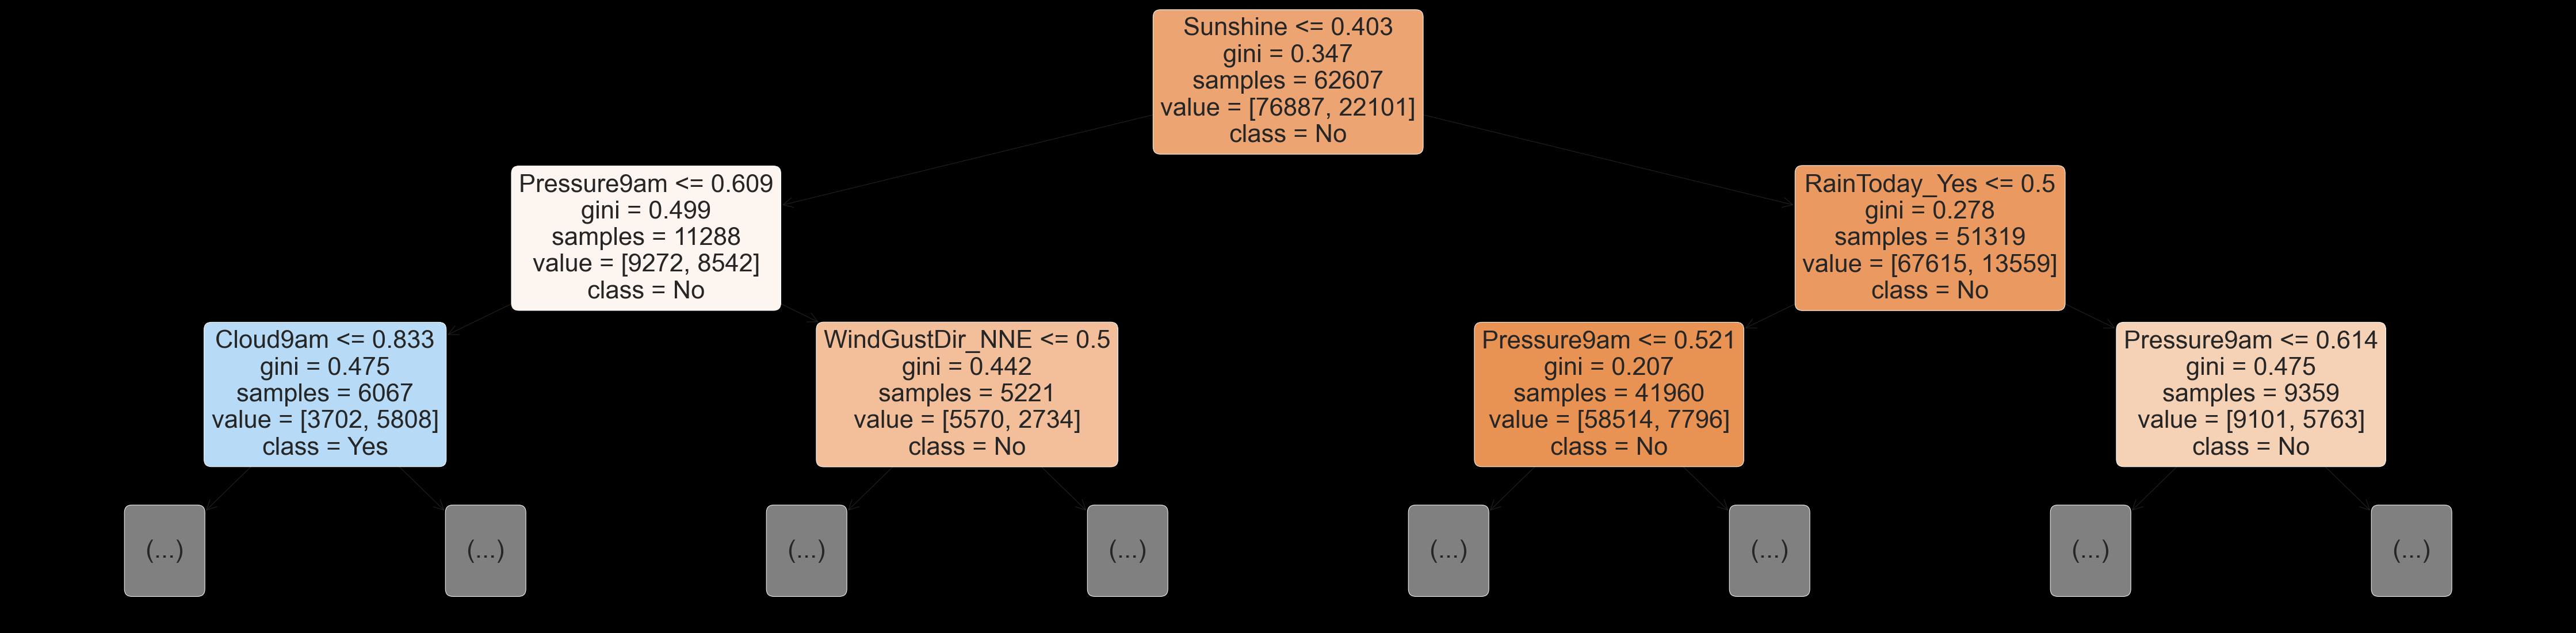

In [78]:
plt.figure(figsize=(80, 20))
plot_tree(forest_model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=forest_model.classes_)

In [79]:
len(forest_model.estimators_)

100

In [80]:
forest_importance_df = pd.DataFrame({
    'feature' : X_train.columns, 
    'importance' : forest_model.feature_importances_
}).sort_values('importance', ascending=False)

In [81]:
forest_importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

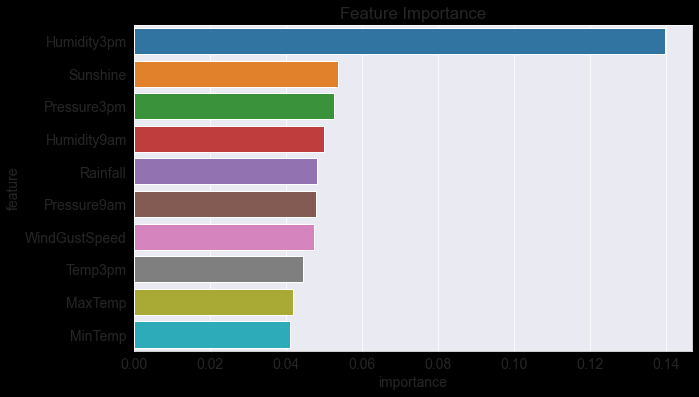

In [82]:
plt.title('Feature Importance')
sns.barplot(data=forest_importance_df.head(10), x='importance', y='feature')

In [83]:
base_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_target)

In [84]:
base_train_accuracy = base_forest_model.score(X_train, train_target)
base_val_accuracy = base_forest_model.score(X_val, val_target)

In [85]:
base_accuracy = base_train_accuracy, base_val_accuracy
base_accuracy

(0.9999494888269285, 0.8566537055307295)

In [86]:
forest_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(X_train, train_target)

In [87]:
forest_model_1.score(X_train, train_target)

0.986958015112943

In [88]:
forest_model_1.score(X_val, val_target)

0.8485868492832686

In [89]:
base_accuracy

(0.9999494888269285, 0.8566537055307295)

In [90]:
forest_model_2 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(X_train, train_target)


In [91]:
forest_model_2.score(X_train, train_target)

0.9999797955307714

In [92]:
forest_model_2.score(X_val, val_target)

0.8577563693343393

In [93]:
def estimator_no_error(est):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=est)
    forest_model_3.fit(X_train, train_target)

    forest_train_accuracy = 1 - forest_model_3.score(X_train, train_target)
    forest_val_accuracy = 1 - forest_model_3.score(X_val, val_target)

    return {
        'No. of Estimators' : est, 
        'Training Error' : forest_train_accuracy, 
        'Validation Error' : forest_val_accuracy
        }

In [94]:
%%time
forest_error_df = pd.DataFrame([estimator_no_error(est) for est in range(1, 10)])

Wall time: 44.5 s
Parser   : 141 ms


In [95]:
forest_error_df

,No. of Estimators,Training Error,Validation Error
0,1,0.081192,0.217167
1,2,0.075545,0.182230
2,3,0.034368,0.179386
3,4,0.040096,0.166386
4,5,0.020467,0.164355
5,6,0.025256,0.160583
6,7,0.013284,0.157797
7,8,0.017639,0.157101
8,9,0.010153,0.153154


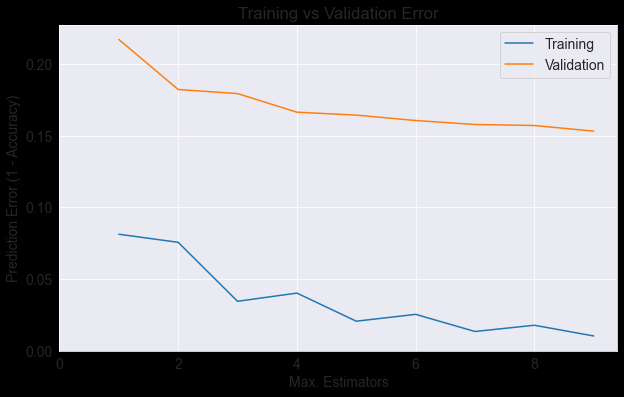

In [96]:
plt.figure()
plt.plot(forest_error_df['No. of Estimators'], forest_error_df['Training Error'])
plt.plot(forest_error_df['No. of Estimators'], forest_error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,10,2))
plt.xlabel('Max. Estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [97]:
def test_params(**params):
    rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_target)
    return rf_model.score(X_train, train_target), rf_model.score(X_val, val_target)

In [98]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [99]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [100]:
def depth_max(dm):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=dm)
    forest_model_3.fit(X_train, train_target)

    forest_train_accuracy = 1 - forest_model_3.score(X_train, train_target)
    forest_val_accuracy = 1 - forest_model_3.score(X_val, val_target)

    return {
        'Max depth' : dm, 
        'Training Error' : forest_train_accuracy, 
        'Validation Error' : forest_val_accuracy
        }

In [101]:
%%time
max_depth_df = pd.DataFrame([depth_max(dm) for dm in range(1, 26)])

Wall time: 12min 14s
Parser   : 155 ms


In [102]:
max_depth_df

,Max depth,Training Error,Validation Error
0,1,0.225108,0.211711
1,2,0.224118,0.211189
2,3,0.206146,0.199350
3,4,0.192953,0.187859
4,5,0.180214,0.175904
5,6,0.170051,0.167779
6,7,0.164666,0.164471
7,8,0.157474,0.160873
8,9,0.151847,0.156985
9,10,0.145775,0.155127


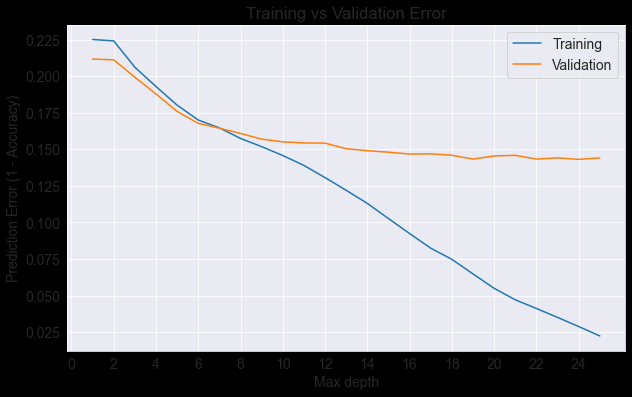

In [103]:
plt.figure()
plt.plot(max_depth_df['Max depth'], max_depth_df['Training Error'])
plt.plot(max_depth_df['Max depth'], max_depth_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,26,2))
plt.xlabel('Max depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [104]:
test_params(max_leaf_nodes= 2**5)

(0.8314341132258456, 0.833904010214149)

In [105]:
test_params(max_leaf_nodes= 2**20)

(0.9999494888269285, 0.8556671116011839)

In [106]:
base_accuracy

(0.9999494888269285, 0.8566537055307295)

In [107]:
def max_leaf(ml):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_leaf_nodes=ml)
    forest_model_3.fit(X_train, train_target)

    forest_train_accuracy = 1 - forest_model_3.score(X_train, train_target)
    forest_val_accuracy = 1 - forest_model_3.score(X_val, val_target)

    return {
        'Max leaf_nodes' : ml, 
        'Training Error' : forest_train_accuracy, 
        'Validation Error' : forest_val_accuracy
        }

In [108]:
%%time
max_leaf_df = pd.DataFrame([max_leaf(ml) for ml in range(2, 32)])

Wall time: 7min 34s


In [109]:
max_leaf_df

,Max leaf_nodes,Training Error,Validation Error
0,2,0.225108,0.211711
1,3,0.225108,0.211711
2,4,0.222290,0.210667
3,5,0.214299,0.205095
4,6,0.207510,0.200162
5,7,0.202247,0.194939
6,8,0.197701,0.190703
7,9,0.194751,0.188149
8,10,0.192205,0.185944
9,11,0.189861,0.183158


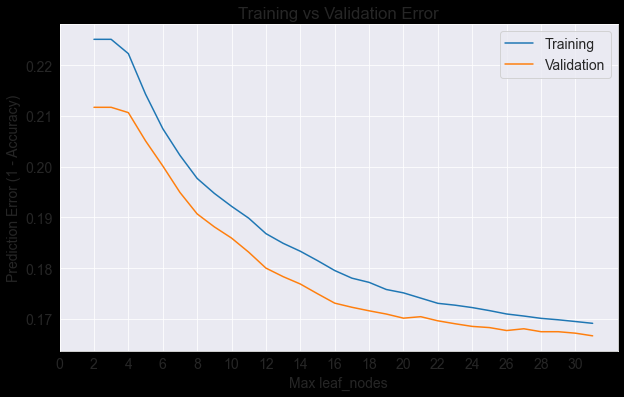

In [110]:
plt.figure()
plt.plot(max_leaf_df['Max leaf_nodes'], max_leaf_df['Training Error'])
plt.plot(max_leaf_df['Max leaf_nodes'], max_leaf_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,32,2))
plt.xlabel('Max leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [111]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [112]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [113]:
def features_max(mf):
    forest_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=mf)
    forest_model_3.fit(X_train, train_target)

    forest_train_accuracy = 1 - forest_model_3.score(X_train, train_target)
    forest_val_accuracy = 1 - forest_model_3.score(X_val, val_target)

    return {
        'Max features' : mf, 
        'Training Error' : forest_train_accuracy, 
        'Validation Error' : forest_val_accuracy
        }

In [114]:
max_leaf_df = pd.DataFrame([features_max('log2')])

In [115]:
max_leaf_df

,Max features,Training Error,Validation Error
0,log2,0.00004,0.144101


In [116]:
max_leaf_df = pd.DataFrame([features_max('sqrt')])

In [117]:
max_leaf_df

,Max features,Training Error,Validation Error
0,sqrt,0.000051,0.143346


In [118]:
max_leaf_df = pd.DataFrame([features_max('auto')])

In [119]:
max_leaf_df

,Max features,Training Error,Validation Error
0,auto,0.000051,0.143346


In [120]:
max_leaf_df = pd.DataFrame([features_max(None)])

In [121]:
max_leaf_df

,Max features,Training Error,Validation Error
0,None,0.000061,0.144333


In [122]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625005051117307, 0.8565956705936975)

In [123]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

In [124]:
base_accuracy

(0.9999494888269285, 0.8566537055307295)

In [125]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [126]:
test_params(min_impurity_decrease=1e-5)

(0.9201115286701418, 0.8547965875457025)

In [127]:
base_accuracy

(0.9999494888269285, 0.8566537055307295)

In [128]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [129]:
test_params(bootstrap=True, max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [130]:
final_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=500,
    max_features=7,
    max_depth=30,
    class_weight={'No' : 1, 'Yes' : 1.5}
)

In [131]:
final_rf.fit(X_train, train_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, random_state=42)

In [132]:
final_rf.score(X_train, train_target), final_rf.score(X_val, val_target)

(0.9920192346547057, 0.8563054959085369)

In [133]:
base_accuracy

(0.9999494888269285, 0.8566537055307295)

In [134]:
X_test.shape

(25974, 119)

In [135]:
test_target.shape

(25974, 21)

In [136]:
X_test.dropna(inplace=True)

<ipython-input-136-34d398633ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.dropna(inplace=True)


In [137]:
test_target.dropna(inplace=True)

In [138]:
test_target.shape

(6280, 21)

In [139]:
X_test.shape

(25974, 119)

fit on test set

In [140]:
def predict_discrete (final_rf, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

    X_input = input_df[numerical_cols + encoded_cols]
    predictions = final_rf.predict(X_input)[0]
    probability = final_rf.predict_proba(X_input)[0][list(final_rf.classes_).index(predictions)]

    return predictions, probability

In [141]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [143]:
predict_discrete(final_rf, new_input)

('Yes', 0.7608595348304203)

In [145]:
australian_rain = {
    'model': final_rf,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_columns,
    'target_col': target_column,
    'numeric_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}


In [146]:
joblib.dump(australian_rain, 'australian_rain.joblib')

['australian_rain.joblib']